# Preprocessing Data

In [1]:
import os
import pandas as pd

# Get the script directory (handles cases where __file__ is not defined)
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

news_dir = os.path.join(script_dir, 'news')
filepath_all = os.path.join(news_dir, 'All_external.csv')
filepath_nas = os.path.join(news_dir, 'nasdaq_exteral_data.csv')

columns = pd.read_csv(filepath_nas, nrows=0).columns.tolist()
print("columns:", columns)

columns: ['Unnamed: 0', 'Date', 'Article_title', 'Stock_symbol', 'Url', 'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary', 'Textrank_summary', 'Lexrank_summary']


In [3]:
import pandas as pd
from datetime import datetime, timedelta

# 步骤1：先快速找出最大日期（仅读取Date列）
max_date = None
for chunk in pd.read_csv(filepath_nas, usecols=['Date'], chunksize=10000):
    chunk_dates = pd.to_datetime(chunk['Date'])
    if max_date is None:
        max_date = chunk_dates.max()
    else:
        max_date = max(max_date, chunk_dates.max())
max_date = pd.to_datetime('2023-12-31', utc=True)
cutoff_date = max_date - timedelta(days=365*5)  # 计算1年前的日期

# 步骤2：分块读取并过滤符合条件的数据
filtered_chunks = []
for chunk in pd.read_csv(filepath_nas, parse_dates=['Date'], chunksize=10000):
    mask = (chunk['Date'] >= cutoff_date) & (chunk['Date'] < max_date)
    
    filtered_chunks.append(chunk[mask])

# 合并结果
final_df = pd.concat(filtered_chunks, ignore_index=True)
print(f"最后5年数据量: {len(final_df)} 行")
print(final_df.head())

最后5年数据量: 2468074 行
   Unnamed: 0                      Date  \
0         0.0 2023-12-16 23:00:00+00:00   
1         1.0 2023-12-12 00:00:00+00:00   
2         2.0 2023-12-12 00:00:00+00:00   
3         3.0 2023-12-07 00:00:00+00:00   
4         4.0 2023-12-07 00:00:00+00:00   

                                       Article_title Stock_symbol  \
0  Interesting A Put And Call Options For August ...            A   
1  Wolfe Research Initiates Coverage of Agilent T...            A   
2  Agilent Technologies Reaches Analyst Target Price            A   
3  Agilent (A) Enhances BioTek Cytation C10 With ...            A   
4  Pre-Market Most Active for Dec 7, 2023 : SQQQ,...            A   

                                                 Url Publisher  Author  \
0  https://www.nasdaq.com/articles/interesting-a-...       NaN     NaN   
1  https://www.nasdaq.com/articles/wolfe-research...       NaN     NaN   
2  https://www.nasdaq.com/articles/agilent-techno...       NaN     NaN   
3  https://

In [17]:
import os

# 创建sampled_news文件夹
sampled_news_dir = os.path.join(script_dir, 'sampled_news')
if not os.path.exists(sampled_news_dir):
    os.makedirs(sampled_news_dir)
    print(f"已创建新文件夹: {sampled_news_dir}")
else:
    print(f"文件夹已存在: {sampled_news_dir}")

# 将final_df保存到新文件夹
output_path = os.path.join(sampled_news_dir, 'nasdaq_last_5years.csv')
final_df.to_csv(output_path, index=False)
print(f"数据已保存到: {output_path}")

# 可选：打印保存的数据统计信息
print(f"保存的数据大小: {final_df.shape[0]}行 x {final_df.shape[1]}列")

文件夹已存在: c:\Users\Mencius\Desktop\independent_project\fin_news\fnspid\FNSPID_source_data\sampled_news
数据已保存到: c:\Users\Mencius\Desktop\independent_project\fin_news\fnspid\FNSPID_source_data\sampled_news\nasdaq_last_5years.csv
保存的数据大小: 2468074行 x 12列


In [2]:
import pandas as pd
from datetime import datetime, timedelta

# 步骤1：先快速找出最大日期（仅读取Date列）
max_date = None
for chunk in pd.read_csv(filepath_all, usecols=['Date'], chunksize=10000):
    chunk_dates = pd.to_datetime(chunk['Date'])
    if max_date is None:
        max_date = chunk_dates.max()
    else:
        max_date = max(max_date, chunk_dates.max())
max_date = pd.to_datetime('2023-12-31', utc=True)
cutoff_date = max_date - timedelta(days=365*5)  # 计算1年前的日期

# 步骤2：分块读取并过滤符合条件的数据
filtered_chunks = []
for chunk in pd.read_csv(filepath_all, parse_dates=['Date'], chunksize=10000):
    mask = (chunk['Date'] >= cutoff_date) & (chunk['Date'] < max_date)
    filtered_chunks.append(chunk[mask])

# 合并结果
final_df = pd.concat(filtered_chunks, ignore_index=True)
print(f"最后5年数据量: {len(final_df)} 行")
print(final_df.head())

C:\Users\Mencius\AppData\Local\Temp\ipykernel_35836\918374968.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk_dates = pd.to_datetime(chunk['Date'])
C:\Users\Mencius\AppData\Local\Temp\ipykernel_35836\918374968.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  for chunk in pd.read_csv(filepath_all, parse_dates=['Date'], chunksize=10000):


最后5年数据量: 780240 行
                       Date  \
0 2020-06-05 06:30:54+00:00   
1 2020-06-03 06:45:20+00:00   
2 2020-05-26 00:30:07+00:00   
3 2020-05-22 08:45:06+00:00   
4 2020-05-22 07:38:59+00:00   

                                       Article_title Stock_symbol  \
0            Stocks That Hit 52-Week Highs On Friday            A   
1         Stocks That Hit 52-Week Highs On Wednesday            A   
2                      71 Biggest Movers From Friday            A   
3       46 Stocks Moving In Friday's Mid-Day Session            A   
4  B of A Securities Maintains Neutral on Agilent...            A   

                                                 Url          Publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  ht

In [3]:
import os

# 创建sampled_news文件夹
sampled_news_dir = os.path.join(script_dir, 'sampled_news')
if not os.path.exists(sampled_news_dir):
    os.makedirs(sampled_news_dir)
    print(f"已创建新文件夹: {sampled_news_dir}")
else:
    print(f"文件夹已存在: {sampled_news_dir}")

# 将final_df保存到新文件夹
output_path = os.path.join(sampled_news_dir, 'all_last_5years.csv')
final_df.to_csv(output_path, index=False)
print(f"数据已保存到: {output_path}")

# 可选：打印保存的数据统计信息
print(f"保存的数据大小: {final_df.shape[0]}行 x {final_df.shape[1]}列")

文件夹已存在: c:\Users\Mencius\Desktop\independent_project\fin_news\fnspid\FNSPID_source_data\sampled_news
数据已保存到: c:\Users\Mencius\Desktop\independent_project\fin_news\fnspid\FNSPID_source_data\sampled_news\all_last_5years.csv
保存的数据大小: 780240行 x 11列


In [7]:
import csv

with open(filepath_nas, "r", encoding='utf-8') as f:
    reader = csv.reader(f)
    
    # 获取列名（第一行）
    columns = next(reader)
    print("列名:", columns)
    
    # 获取前5行数据
    print("\n前5行数据:")
    for i, row in enumerate(reader):
        if i >= 4:  # 0-based，此处获取第2-5行（跳过标题）
            break
        print(row)

列名: ['Unnamed: 0', 'Date', 'Article_title', 'Stock_symbol', 'Url', 'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary', 'Textrank_summary', 'Lexrank_summary']

前5行数据:
['0.0', '2023-12-16 23:00:00 UTC', 'Interesting A Put And Call Options For August 2024', 'A', 'https://www.nasdaq.com/articles/interesting-a-put-and-call-options-for-august-2024', '', '', 'Investors in Agilent Technologies, Inc. (Symbol: A) saw new options begin trading this week, for the August 2024 expiration. One of the key inputs that goes into the price an option buyer is willing to pay, is the time value, so with 241 days until expiration the newly trading contracts represent a possible opportunity for sellers of puts or calls to achieve a higher premium than would be available for the contracts with a closer expiration. At Stock Options Channel, our YieldBoost formula has looked up and down the A options chain for the new August 2024 contracts and identified one put and one call contract of particular i

In [15]:
import pandas as pd

# 分块跳过前7999行
chunksize = 1000
for i, chunk in enumerate(pd.read_csv(filepath_nas, chunksize=chunksize)):
    if (i + 1) * chunksize >= 8000:
        row_8000 = chunk.iloc[8000 - i * chunksize - 1]
        print(row_8000)
        break

Unnamed: 0                                                     7999.0
Date                                          2016-04-22 00:00:00 UTC
Article_title       American Airlines (AAL) Stock Falls Despite Ea...
Stock_symbol                                                      AAL
Url                 https://www.nasdaq.com/articles/american-airli...
Publisher                                                         NaN
Author                                                            NaN
Article             InvestorPlace InvestorPlace - Stock Market New...
Lsa_summary         InvestorPlace InvestorPlace - Stock Market New...
Luhn_summary        InvestorPlace InvestorPlace - Stock Market New...
Textrank_summary    InvestorPlace InvestorPlace - Stock Market New...
Lexrank_summary     InvestorPlace InvestorPlace - Stock Market New...
Name: 7999, dtype: object


上面代码是切数据，后面代码是可视化5年数据

In [21]:
import os
import pandas as pd

# Get the script directory (handles cases where __file__ is not defined)
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

news_dir = os.path.join(script_dir, 'sampled_news')
filepath_all = os.path.join(news_dir, 'all_last_5years.csv.csv')
filepath_nas = os.path.join(news_dir, 'nasdaq_last_5years.csv')

columns = pd.read_csv(filepath_nas, nrows=0).columns.tolist()
print("columns:", columns)

columns: ['Unnamed: 0', 'Date', 'Article_title', 'Stock_symbol', 'Url', 'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary', 'Textrank_summary', 'Lexrank_summary']


In [22]:
# 读取标普500数据并筛选2023年前加入的公司
symbol = pd.read_csv(os.path.join(script_dir, 'sp500_companies.csv'))
symbol['Date_added'] = pd.to_datetime(symbol['Date_added'], errors='coerce')
symbol_before_2023 = symbol[symbol['Date_added'] < pd.Timestamp('2018-12-31')]
valid_symbols = set(symbol_before_2023['Symbol'].dropna().astype(str))
print(len(valid_symbols))


403


C:\Users\Mencius\AppData\Local\Temp\ipykernel_792\3202431944.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  symbol['Date_added'] = pd.to_datetime(symbol['Date_added'], errors='coerce')


In [23]:

nas = pd.read_csv(filepath_nas, parse_dates=['Date'])

valid_symbols_list = list(valid_symbols)
nas = nas[nas['Stock_symbol'].isin(valid_symbols_list)]

print(len(nas))


C:\Users\Mencius\AppData\Local\Temp\ipykernel_792\1710534607.py:1: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  nas = pd.read_csv(filepath_nas, parse_dates=['Date'])


543525


In [24]:
unique_symbols_count = nas['Stock_symbol'].nunique()
print(f"nas中有 {unique_symbols_count} 个不同的symbol")
# print(nas['Stock_symbol'].unique())


nas中有 379 个不同的symbol


In [25]:
# 读取数据
print("开始读取数据...")
df = nas
print(f"数据读取完成，共 {df.shape[0]} 行，{df.shape[1]} 列")

# 基本信息
print("\n===== 数据基本信息 =====")
print("列名:", df.columns.tolist())
print("\n前5行数据:")
print(df.head())

# 统计涉及的股票数量、总共的新闻数量、涉及的日期数量
stock_count = df['Stock_symbol'].nunique()
total_news_count = df.shape[0]
date_count = df['Date'].nunique()

print(f"\n涉及的股票数量: {stock_count}")
print(f"总共的新闻数量: {total_news_count}")
print(f"涉及的日期数量: {date_count}")
min_date = df['Date'].min()
max_date = df['Date'].max()
print(f"最小日期: {min_date}")
print(f"最大日期: {max_date}")

# 数据类型和缺失值
print("\n===== 数据类型和缺失值 =====")
print(df.dtypes)
print("\n缺失值统计:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({'缺失值数量': missing_data, '缺失百分比': missing_percent})
print(missing_info[missing_info['缺失值数量'] > 0])

# 时间分析
print("\n===== 时间分析 =====")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# 按年份和月份统计文章数量
news_by_year = df['Year'].value_counts().sort_index()
print("\n每年文章数量:")
print(news_by_year)

news_by_month = df['Month'].value_counts().sort_index()
print("\n每月文章数量:")
print(news_by_month)

# 股票符号分析
print("\n===== 股票符号分析 =====")
top_stocks = df['Stock_symbol'].value_counts().head(20)
print("\n被提及最多的20支股票:")
print(top_stocks)

# 发布者分析
print("\n===== 发布者分析 =====")
if 'Publisher' in df.columns:
    publisher_counts = df['Publisher'].value_counts().head(10)
    print("\n前10名文章发布者:")
    print(publisher_counts)

# 文章标题长度分析
print("\n===== 文章标题分析 =====")
df['Title_length'] = df['Article_title'].astype(str).apply(len)
print("\n文章标题长度统计:")
print(df['Title_length'].describe())

# 文章长度分析
print("\n===== 文章内容分析 =====")
if 'Article' in df.columns:
    df['Article_length'] = df['Article'].astype(str).apply(len)
    print("\n文章内容长度统计:")
    print(df['Article_length'].describe())

# 保存统计信息
print("\n统计结果已生成")

开始读取数据...
数据读取完成，共 543525 行，12 列

===== 数据基本信息 =====
列名: ['Unnamed: 0', 'Date', 'Article_title', 'Stock_symbol', 'Url', 'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary', 'Textrank_summary', 'Lexrank_summary']

前5行数据:
   Unnamed: 0                      Date  \
0         0.0 2023-12-16 23:00:00+00:00   
1         1.0 2023-12-12 00:00:00+00:00   
2         2.0 2023-12-12 00:00:00+00:00   
3         3.0 2023-12-07 00:00:00+00:00   
4         4.0 2023-12-07 00:00:00+00:00   

                                       Article_title Stock_symbol  \
0  Interesting A Put And Call Options For August ...            A   
1  Wolfe Research Initiates Coverage of Agilent T...            A   
2  Agilent Technologies Reaches Analyst Target Price            A   
3  Agilent (A) Enhances BioTek Cytation C10 With ...            A   
4  Pre-Market Most Active for Dec 7, 2023 : SQQQ,...            A   

                                                 Url Publisher  Author  \
0  https://www.nasda

In [26]:
publisher_nan_count = df['Publisher'].isna().sum()
total_publisher_count = df['Publisher'].notna().sum()

print(f"\nPublisher列中缺失值数量: {publisher_nan_count}")
print(f"Publisher列中非缺失值数量: {total_publisher_count}")



Publisher列中缺失值数量: 389630
Publisher列中非缺失值数量: 153895


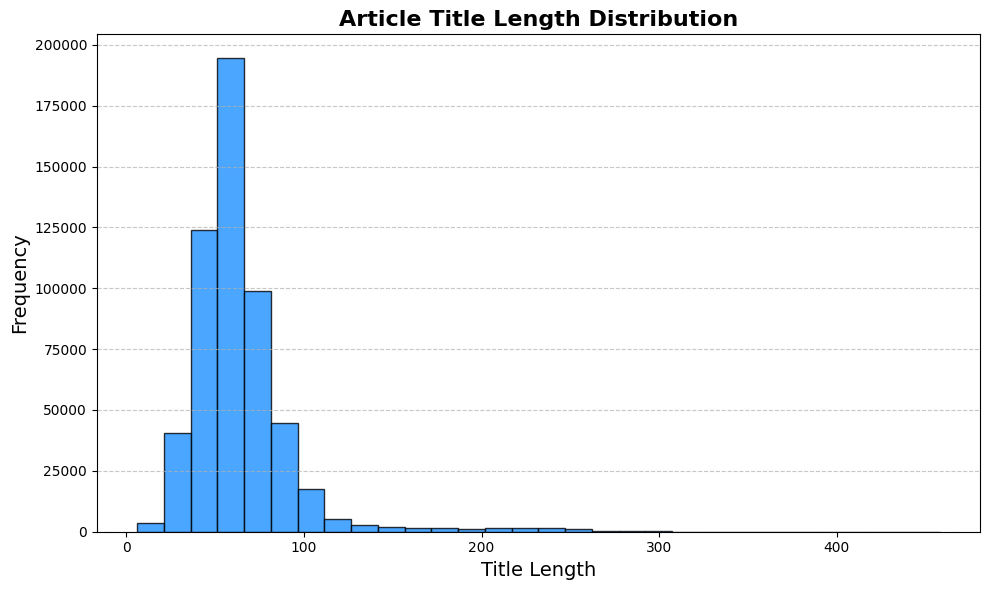

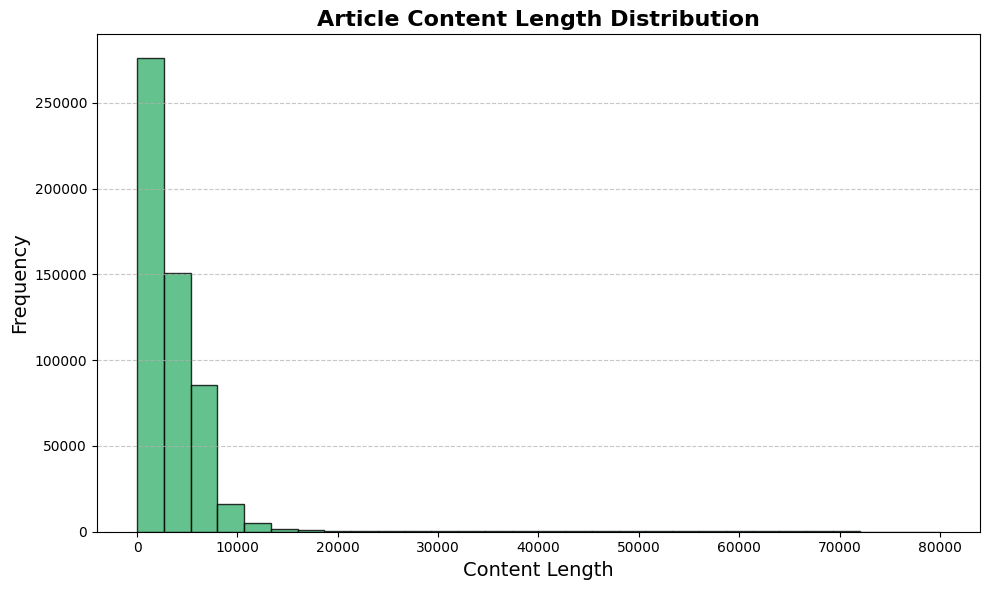

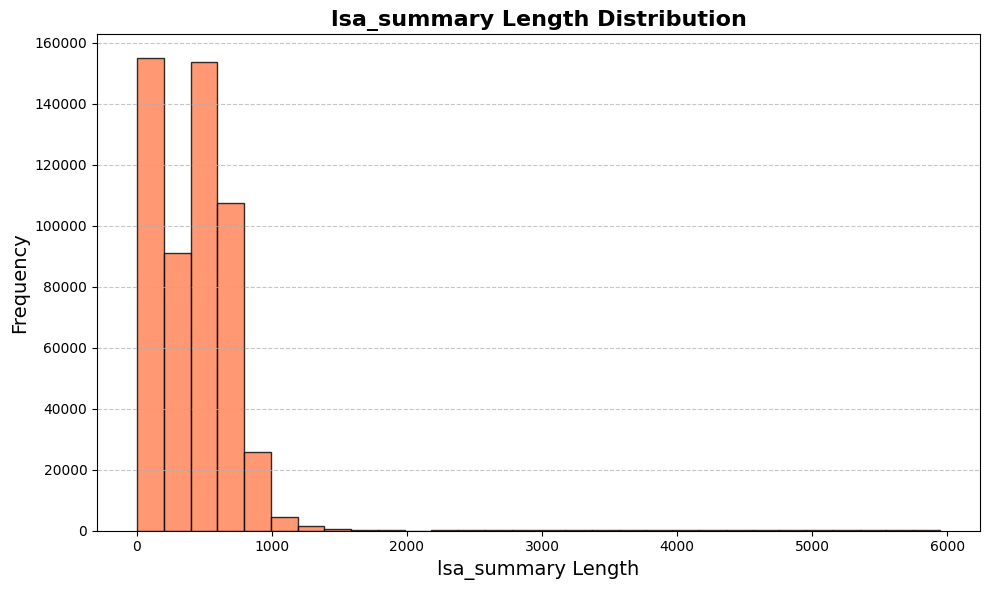

In [27]:
import matplotlib.pyplot as plt
import os

# 创建img文件夹（如果不存在）
if not os.path.exists('img'):
    os.makedirs('img')

# Plot histogram of article title lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Title_length'], bins=30, color='dodgerblue', alpha=0.8, edgecolor='black')
plt.title('Article Title Length Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Title Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# plt.savefig('img/article_title_length_distribution.png')  # 保存图像
plt.close()  # 关闭图形以释放内存

# Plot histogram of article content lengths
if 'Article_length' in df.columns:
    filtered_article_length = df[df['Article_length'] <= 80000]['Article_length']
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_article_length, bins=30, color='mediumseagreen', alpha=0.8, edgecolor='black')
    plt.title('Article Content Length Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Content Length', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    # plt.savefig('img/article_content_length_distribution.png')  # 保存图像
    plt.close()  # 关闭图形以释放内存

# Plot histogram of lsa_summary lengths
if 'Lsa_summary' in df.columns:
    df['lsa_summary_length'] = df['Lsa_summary'].astype(str).apply(len)
    filtered_lsa_summary_length = df[df['lsa_summary_length'] <= 6000]['lsa_summary_length']
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_lsa_summary_length, bins=30, color='coral', alpha=0.8, edgecolor='black')
    plt.title('lsa_summary Length Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('lsa_summary Length', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    # plt.savefig('img/lsa_summary_length_distribution.png')  # 保存图像
    plt.close()  # 关闭图形以释放内存


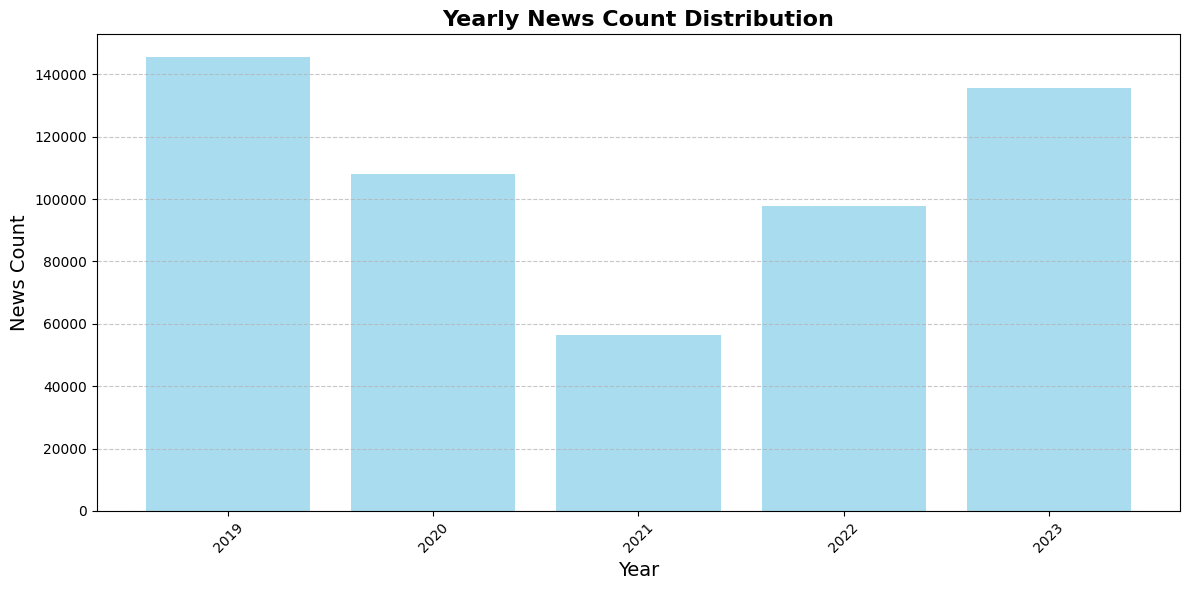

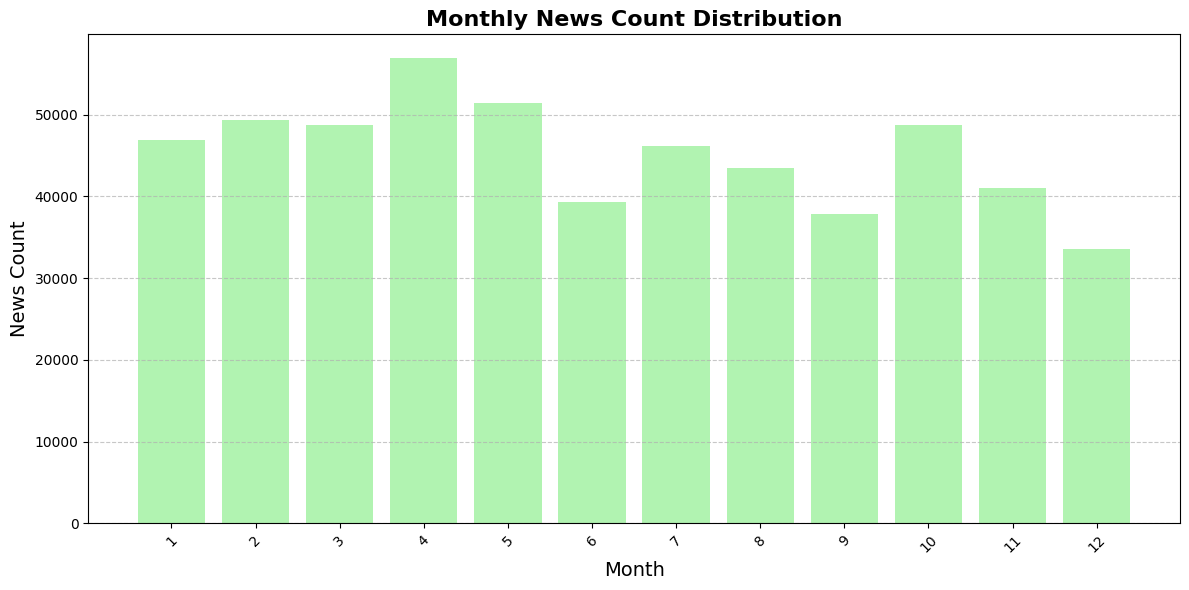

C:\Users\Mencius\AppData\Local\Temp\ipykernel_792\776431385.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_distribution = news_count_distribution.groupby(news_count_distribution_binned).sum()


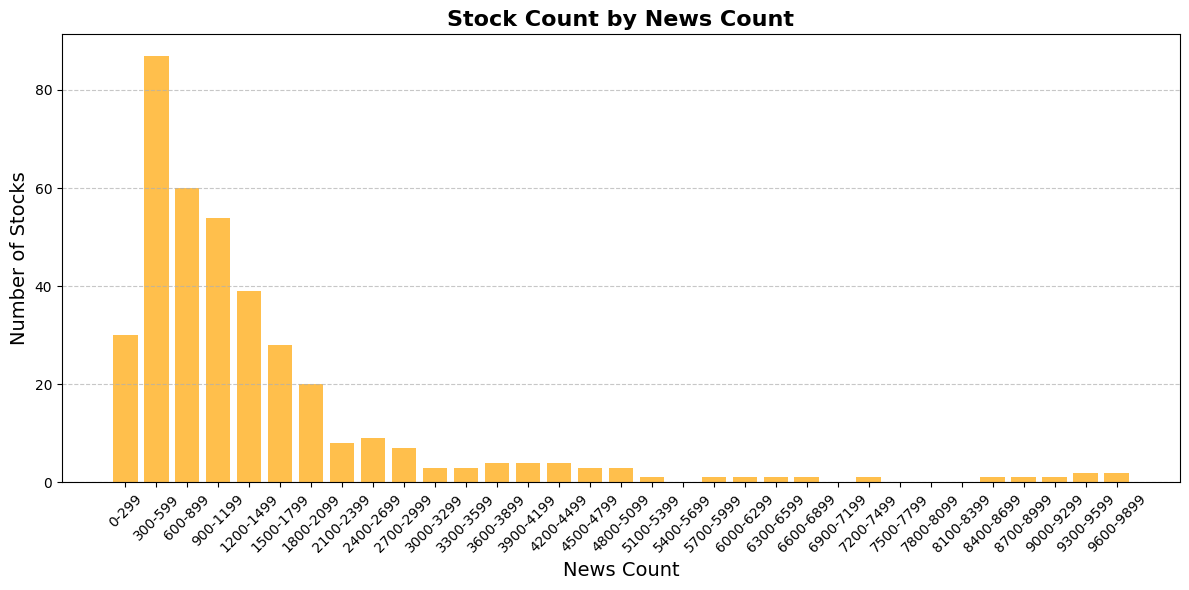

In [28]:
# 创建img文件夹（如果不存在）
if not os.path.exists('img'):
    os.makedirs('img')

# Count news by year
yearly_news_count = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(yearly_news_count.index, yearly_news_count.values, color='skyblue', alpha=0.7)
plt.title('Yearly News Count Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('News Count', fontsize=14)
plt.xticks(yearly_news_count.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# plt.savefig('img/yearly_news_count_distribution.png')  # 保存图像
plt.close()  # 关闭图形以释放内存

# Count news by month
monthly_news_count = df['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_news_count.index, monthly_news_count.values, color='lightgreen', alpha=0.7)
plt.title('Monthly News Count Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('News Count', fontsize=14)
plt.xticks(monthly_news_count.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# plt.savefig('img/monthly_news_count_distribution.png')  # 保存图像
plt.close()  # 关闭图形以释放内存

# Count news for each stock
stock_news_count = df['Stock_symbol'].value_counts()

# 统计每个新闻数量对应的股票数量
news_count_distribution = stock_news_count.value_counts().sort_index()

# 定义分段的区间
bins = range(0, news_count_distribution.index.max() + 301, 300)  # 每1000为一个刻度
news_count_distribution_binned = pd.cut(news_count_distribution.index, bins=bins, right=False)

# 统计每个区间的股票数量
binned_distribution = news_count_distribution.groupby(news_count_distribution_binned).sum()

plt.figure(figsize=(12, 6))
plt.bar(range(len(binned_distribution)), binned_distribution.values, color='orange', alpha=0.7)
plt.title('Stock Count by News Count', fontsize=16, fontweight='bold')
plt.xlabel('News Count', fontsize=14)
plt.ylabel('Number of Stocks', fontsize=14)

# 创建更清晰的横坐标标签
bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
plt.xticks(range(len(binned_distribution)), bin_labels, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# plt.savefig('img/stock_count_by_news_count.png')  # 保存图像
plt.close()  # 关闭图形以释放内存
